This tutorial can be run under `examples` directory of `qsofitmore`. For basics of `PyQSOFit`, see https://github.com/legolason/PyQSOFit/blob/master/example/example.ipynb

### 2.2 Import `QSOFitNew` class from `qsofitmore` 

In [1]:
from qsofitmore import QSOFitNew
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table

The output path (`path`) should contain a line list file (`qsopar.fits` generated in `1-make_parlist.ipynb`). The output files (including fits table and plots) are stored in `path`. 

In [2]:
path = "./output/"

#### a) From IRAF multispec

If you have a spectrum generated by `IRAF`/`PyRAF`, in which case the 4 bands of the fits file are:  
BANDID1 = 'spectrum - background fit, weights variance, clean no'               
BANDID2 = 'raw - background fit, weights none, clean no'                        
BANDID3 = 'background - background fit'                                         
BANDID4 = 'sigma - background fit, weights variance, clean no'  
The first and fourth bands are flux and flux error, respectively, in unit $\rm erg\;s^{-1}\;cm^{-2}\,\AA^{-1}$
You can simply load the data with the classmethod `QSOFitNew.fromiraf`, which does the unit conversion automatically.

In [3]:
q = QSOFitNew.fromiraf("/Users/yuming/tools/qsofitmore/qsofitmore/examples/data/UGC_3374_ccds.fits",
                       redshift=0.02004,telescope='1.3m',path=path)

1170


### 2.4 Fit the spectrum 

#### Choose a dust map (default: sfd map)

In [4]:
q.setmapname("sfd")

If you want to use planck dust map instead, make sure you have installed [`dustmaps`](https://dustmaps.readthedocs.io/en/latest/installation.html) and downloaded the files of planck dust map (see https://dustmaps.readthedocs.io/en/latest/installation.html). Then you can use `q.setmapname("planck")` to choose the planck map.

#### Apply `q.Fit()`  

By default, `QSOFit.Fit()` of `PyQSOFit` does not output derived quantities of narrow lines, including FWHM, sigma, EW, and integrated flux (area); the `q.line_prop()` method should be called to calculate these parameters after fitting.  

In `qsofitmore`, after specifying `MC = True` when calling `q.Fit()`, narrow line properties above are calculated during fitting and are stored in `path + objectname.fits`.

Set `broken_pl = True` if you want to use a broken power-law model (break at 4661 AA) to fit the continuum.

Name is now UGC_3374.
The dust map is sfd


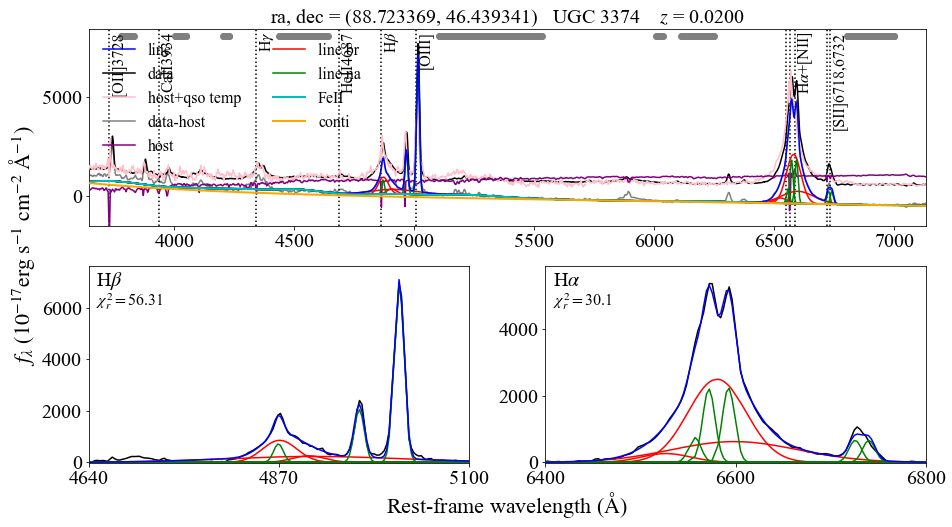

In [5]:
q.Fit(name = None, deredden = True, wave_range = None, wave_mask =None, 
      decomposition_host = True, Mi = None, npca_gal = 5, npca_qso = 20,
      broken_pl = False, Fe_uv_op = True, poly = True, BC = False, 
      MC = True, n_trails = 20, linefit = True, 
      tie_lambda = True, tie_width = True, 
      tie_flux_1 = True, tie_flux_2 = True,
      save_result = True, plot_fig = True, save_fig = True, 
      plot_line_name = True, plot_legend = True,
      # save_fig_path = figpath, 
      # save_fits_path = respath,
      save_fits_name = None)

#### Print fitting results
Try: 
`q.all_result_name`, `q.all_result`, `q.na_line_result`, `q.conti_result_name`, `q.gauss_result_name`